In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

In [46]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [61]:
target = train_df['revenue']

In [47]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  3000 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [35]:
train_df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.784667,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.253944,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


(array([2.411e+03, 3.630e+02, 1.230e+02, 5.500e+01, 2.000e+01, 1.700e+01,
        7.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00e+00, 3.80e+07, 7.60e+07, 1.14e+08, 1.52e+08, 1.90e+08,
        2.28e+08, 2.66e+08, 3.04e+08, 3.42e+08, 3.80e+08]),
 <a list of 10 Patch objects>)

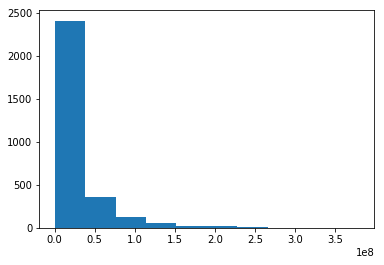

In [8]:
plt.hist(train_df['budget'])

{'boxes': [<matplotlib.lines.Line2D at 0xefb1550>],
 'caps': [<matplotlib.lines.Line2D at 0xefb1f60>,
 'fliers': [<matplotlib.lines.Line2D at 0xed33c18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xed337f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xefb16a0>,
  <matplotlib.lines.Line2D at 0xefb1b38>]}

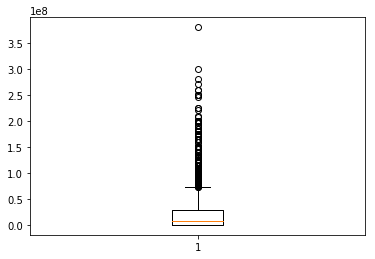

In [9]:
plt.boxplot(train_df['budget'])

(array([2.965e+03, 2.300e+01, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([1.00000000e-06, 2.94337046e+01, 5.88674082e+01, 8.83011118e+01,
        1.17734815e+02, 1.47168519e+02, 1.76602223e+02, 2.06035926e+02,
        2.35469630e+02, 2.64903333e+02, 2.94337037e+02]),
 <a list of 10 Patch objects>)

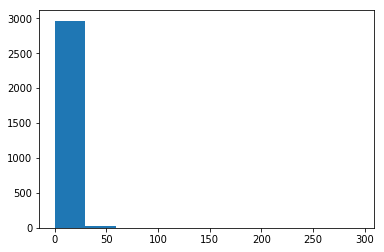

In [10]:
plt.hist(train_df['popularity'])

{'boxes': [<matplotlib.lines.Line2D at 0xedc8240>],
 'caps': [<matplotlib.lines.Line2D at 0xedc8c50>,
 'fliers': [<matplotlib.lines.Line2D at 0xedd3908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xedd34e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xedc8390>,
  <matplotlib.lines.Line2D at 0xedc8828>]}

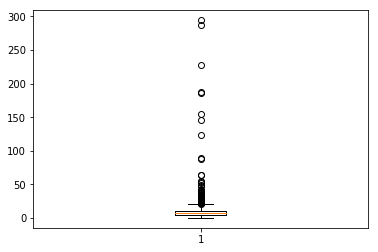

In [11]:
plt.boxplot(train_df['popularity'])

(array([2.632e+03, 2.180e+02, 7.900e+01, 2.400e+01, 1.800e+01, 1.200e+01,
        1.100e+01, 2.000e+00, 1.000e+00, 3.000e+00]),
 array([1.00000000e+00, 1.51955792e+08, 3.03911583e+08, 4.55867374e+08,
        6.07823165e+08, 7.59778956e+08, 9.11734746e+08, 1.06369054e+09,
        1.21564633e+09, 1.36760212e+09, 1.51955791e+09]),
 <a list of 10 Patch objects>)

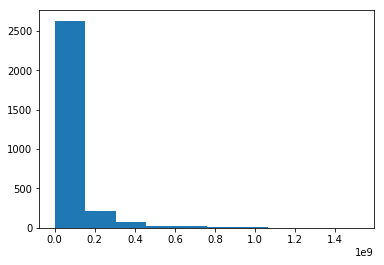

In [14]:
plt.hist(train_df['revenue'])

{'boxes': [<matplotlib.lines.Line2D at 0x112f7630>],
 'caps': [<matplotlib.lines.Line2D at 0x112ff080>,
 'fliers': [<matplotlib.lines.Line2D at 0x112ffcf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x112ff8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x112f7780>,
  <matplotlib.lines.Line2D at 0x112f7c18>]}

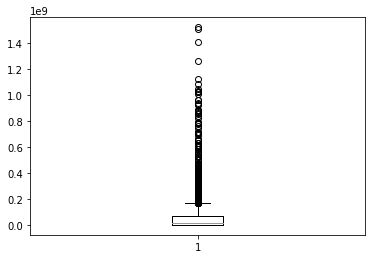

In [15]:
plt.boxplot(train_df['revenue'])

In [29]:
train_df['original_language'].value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
pt       6
nl       6
fa       5
da       5
ro       4
tr       3
hu       3
te       2
pl       2
fi       2
no       2
ml       2
el       1
id       1
bn       1
sr       1
ar       1
mr       1
he       1
nb       1
ur       1
vi       1
cs       1
Name: original_language, dtype: int64

In [30]:
train_df['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [48]:
train_df['runtime'] = train_df['runtime'].fillna(0)

(array([1.500e+01, 9.000e+00, 1.309e+03, 1.383e+03, 2.350e+02, 4.100e+01,
        6.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  33.8,  67.6, 101.4, 135.2, 169. , 202.8, 236.6, 270.4,
        304.2, 338. ]),
 <a list of 10 Patch objects>)

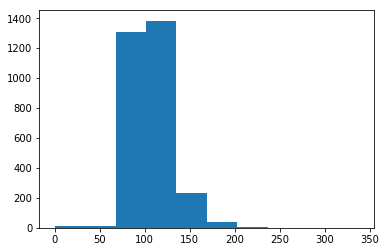

In [34]:
plt.hist(train_df['runtime'])

{'boxes': [<matplotlib.lines.Line2D at 0x17b8d518>],
 'caps': [<matplotlib.lines.Line2D at 0x17b8df28>,
 'fliers': [<matplotlib.lines.Line2D at 0x1761cbe0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1761c7b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x17b8d668>,
  <matplotlib.lines.Line2D at 0x17b8db00>]}

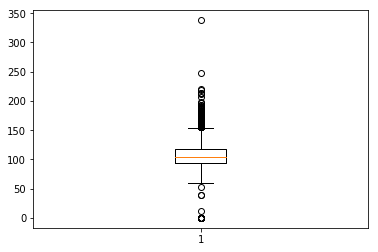

In [36]:
plt.boxplot(train_df['runtime'])

In [49]:
train_df['homepage'] = train_df['homepage'].fillna(0)
train_df['homepage'] = train_df['homepage'].apply(lambda x: 0 if x==0 else 1)

In [51]:
train_df['homepage'].value_counts()

0    2054
1     946
Name: homepage, dtype: int64

In [54]:
other = ('zh','de','ta','sv','pt','nl','fa','da','ro','tr','hu','te','pl','fi','no','ml','el','id','bn','sr','ar','mr','he','nb','ur','vi','cs')

In [57]:
train_df['original_language'] = train_df['original_language'].apply(lambda x: 'other' if x in other else x)

In [64]:
del train_df['imdb_id']
del train_df['revenue']
del train_df['poster_path']

In [71]:
le = LabelEncoder()

In [72]:
train_df['status'] = le.fit_transform(train_df['status'])

In [77]:
train_df['release_date'] = pd.to_datetime(train_df['release_date'])
train_df['release_year'] = train_df['release_date'].apply(lambda x: x.year)
train_df['release_month'] = train_df['release_date'].apply(lambda x: x.month)
train_df['release_day'] = train_df['release_date'].apply(lambda x: x.dayofweek)

In [79]:
train_df.head().T

,0,1,2,3,4
id,1,2,3,4,5
belongs_to_collection,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 107674, 'name': 'The Princess Diaries ...",NaN,NaN,NaN
budget,14000000,40000000,3300000,1200000,0
genres,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 18, 'name': 'Drama'}]","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
homepage,0,0,1,1,0
original_language,en,en,en,hi,ko
original_title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash,Kahaani,마린보이
overview,"When Lou, who has become the ""father of the In...",Mia Thermopolis is now a college graduate and ...,"Under the direction of a ruthless instructor, ...",Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,Marine Boy is the story of a former national s...
popularity,6.57539,8.24889,64.3,3.17494,1.14807
production_companies,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'name': 'Bold Films', 'id': 2266}, {'name': ...",NaN,NaN
